In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
voxels_filepath = '/home/user/Documents/workspace/outputs/voxelstrace_case_1_3_6_keep_Jul_17_2020_03:20:33.csv'
memory_filepath = '/home/user/Documents/workspace/outputs/memorytrace_case_1_3_6_keep_Jul_17_2020_03:20:33.csv'

In [3]:
vox_data = pd.read_csv(voxels_filepath)
vox_data.head()

,nb_voxels
0,8000000
1,4080000
2,12080000
3,8160000
4,16160000


In [4]:
print(len(vox_data.index))

686


In [5]:
vox_data = vox_data.apply(lambda x: x*2/1000000, axis=1)
vox_data.head(15)

,nb_voxels
0,16.00
1,8.16
2,24.16
3,16.32
4,32.32
5,16.64
6,32.64
7,24.80
8,40.80
9,25.12


In [6]:
mem_data = pd.read_csv(memory_filepath)
mem_data.head()

,ram,swap
0,4359.515625,3.5
1,4359.515625,3.5
2,4436.496094,3.5
3,4508.777344,3.5
4,4550.792969,3.5


In [7]:
mem_data = mem_data.apply(np.round, axis=1)
mem_data.head()

,ram,swap
0,4360.0,4.0
1,4360.0,4.0
2,4436.0,4.0
3,4509.0,4.0
4,4551.0,4.0


In [8]:
start_ram = mem_data.iloc[0][0]
mem_data['ram'] = mem_data['ram'].apply(lambda x: x - start_ram)
mem_data.head()

,ram,swap
0,0.0,4.0
1,0.0,4.0
2,76.0,4.0
3,149.0,4.0
4,191.0,4.0


[Text(0, 0.5, 'RAM used (MB)'), Text(0.5, 0, 'time (5s interval)')]

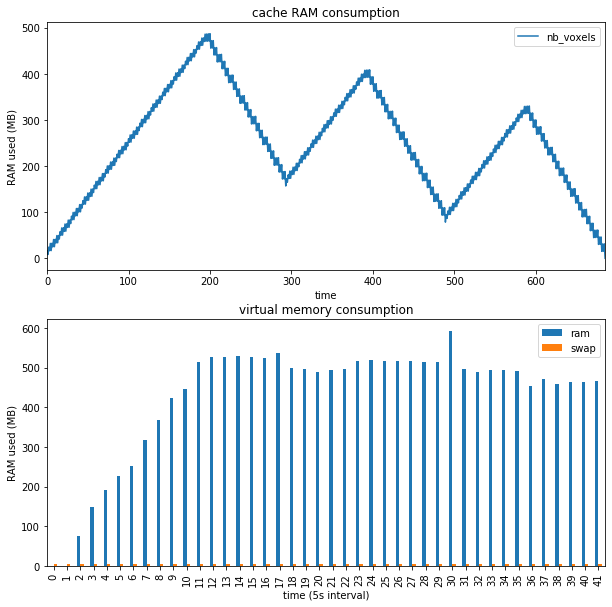

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True)
plt.subplot(2,1,1)
vox_data.plot(title='cache RAM consumption', ax=plt.gca())
plt.gca().set(xlabel='time', ylabel='RAM used (MB)')
mem_data.plot(title='virtual memory consumption', ax=axes[1], kind='bar')
axes[1].set(xlabel='time (5s interval)', ylabel='RAM used (MB)')